In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('delaney_solubility_with_descriptors.csv')

In [5]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


# Data preparation


In [6]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [7]:
# Drop y, axis=1 for column not rows
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


# Split into test and training sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [15]:
print(len(X_train))
print(len(X_test))

915
229


# Building Linear Regression model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
# Use the model

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [21]:
print(lr_train_mse)
print(lr_train_r2)
print(lr_test_mse)
print(lr_test_r2)


1.007536295109369
0.7645051774663391
1.0206953660861033
0.7891616188563282


# Building Random forest model

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [27]:
# Make prediction

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [28]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print(lr_train_mse)
print(lr_train_r2)
print(lr_test_mse)
print(lr_test_r2)

1.007536295109369
0.7645051774663391
1.0206953660861033
0.7891616188563282


Text(0.5, 0, 'Experimental logS')

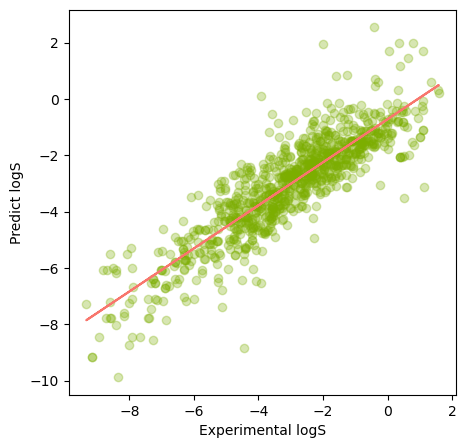

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')
